### Introduction to IPSec: racoon

In [ ]:
#creating keys to encrypt the communication
dd if=/dev/random count=24 bs=1 | xxd -ps

#in etc/racoon/psk.txt add the key to the tunnel ends; adding 0x to make it hex
147.210.20.2  0xkey #public addr of other end
172.16.0.2  0xkey   #addr of current machine

Configuring racoon

First block of following code defines the negotiation done during the establishment of the connection
The second block defines what actions must be done when a machine belonging to the network tries to communicate through the bridge(?)

In [ ]:
# on each end machine, configure the /etc/racoon/racoon.conf file; do the same
# on the other machine

 remote @ip_other{
 proposal {
 encryption_algorithm aes;
 hash_algorithm sha1;
 authentication_method pre_shared_key;
 dh_group modp1024;
 }

verify_identifier on;
 peers_identifier address;
 exchange_mode main;
 }
 sainfo address @network_current/masque[any] any address @network_other/masque[any] any {
 pfs_group modp1024;
 encryption_algorithm aes,3des;
 authentication_algorithm hmac_sha1,hmac_md5;
 compression_algorithm deflate;
 }

Configuring IPSec modes:
Adding a description on the files to encrypt
Files of the two end machines must be modified

In [ ]:
# editing the /etc/ipsec-tools.conf file

flush;
spdflush;

spdadd @network_curr/masque[any] @network_other/masque[any] any -P out ipsec
esp/transport//unique; #no address needed after transport so two //

spdadd @network_other/masque[any] @network_curr/masque[any] any -P in ipsec
esp/transport//unique

# using an esp tunnel, set the /etc/default/setkey to yes

In [ ]:
# reset the daemons used
/etc/init.d/racoon restart; /etc/init.d/setkey restart

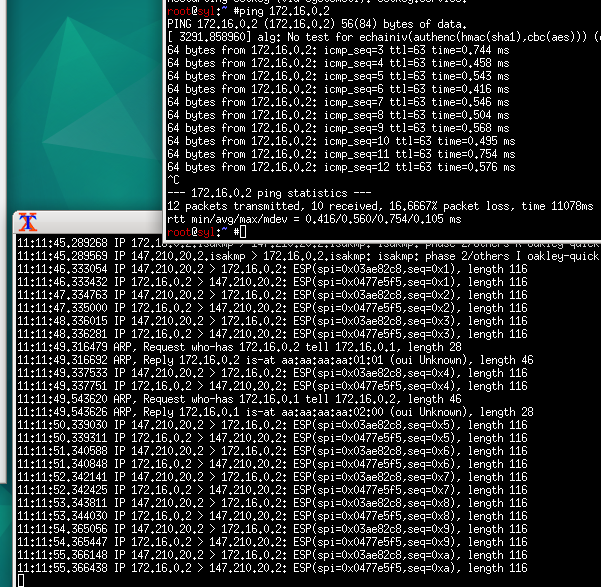

Communications between two other machines:

In [ ]:
flush;
spdflush;

spdadd 192.168.0.0/24[any] 10.0.0.0/24[any] any -P out ipsec
ah/tunnel/172.16.0.2-147.210.20.2/unique;

spdadd 10.0.0.0/24[any] 192.168.0.0./24[any] any -P in ipsec
ah/tunnel/147.210.20.2-172.16.0.2/unique;

Using a AH tunnel

In [ ]:
flush;
spdflush;

spdadd @network_curr/masque[any] @network_other/masque[any] any -P out ipsec
ah/tunnel/172.16.0.2-147.210.20.2/unique;

spdadd @network_other/masque[any] @network_curr/masque[any] any -P in ipsec
ah/tunnel/147.210.20.2-172.16.0.2/unique;

AH doesn't hide the trafic
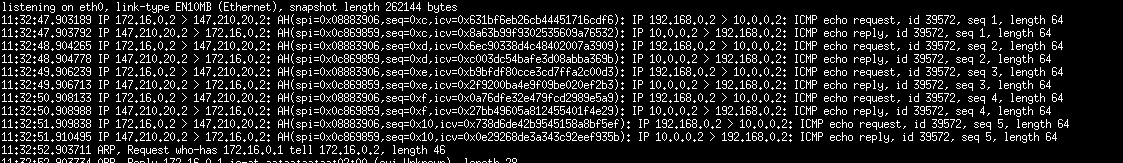